# Support Vector Regression (SVR)

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('corona_ext_final.csv')
X = dataset.iloc[:, 0:1].values
y = dataset.iloc[:, 1].values

In [ ]:
print( X)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]]


In [ ]:
print(y)

[4126295 3913931 4576214 4798193 4955886 5074464 5527230 5382604 5199383
 5183452 4532818 4562027 4386862 4149603 4907489 5052309 5218219 5570367
 5944675 5790223 5571293 5487128 4779850 4876926 4663407 4149603 1975303
   46743   81263  194734 1102854 1356383]


In [ ]:
y = y.reshape(len(y),1)

In [ ]:
print(y)

[[4126295]
 [3913931]
 [4576214]
 [4798193]
 [4955886]
 [5074464]
 [5527230]
 [5382604]
 [5199383]
 [5183452]
 [4532818]
 [4562027]
 [4386862]
 [4149603]
 [4907489]
 [5052309]
 [5218219]
 [5570367]
 [5944675]
 [5790223]
 [5571293]
 [5487128]
 [4779850]
 [4876926]
 [4663407]
 [4149603]
 [1975303]
 [  46743]
 [  81263]
 [ 194734]
 [1102854]
 [1356383]]


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [ ]:
print(X)

[[-1.67874412]
 [-1.57043805]
 [-1.46213197]
 [-1.3538259 ]
 [-1.24551983]
 [-1.13721376]
 [-1.02890769]
 [-0.92060161]
 [-0.81229554]
 [-0.70398947]
 [-0.5956834 ]
 [-0.48737732]
 [-0.37907125]
 [-0.27076518]
 [-0.16245911]
 [-0.05415304]
 [ 0.05415304]
 [ 0.16245911]
 [ 0.27076518]
 [ 0.37907125]
 [ 0.48737732]
 [ 0.5956834 ]
 [ 0.70398947]
 [ 0.81229554]
 [ 0.92060161]
 [ 1.02890769]
 [ 1.13721376]
 [ 1.24551983]
 [ 1.3538259 ]
 [ 1.46213197]
 [ 1.57043805]
 [ 1.67874412]]


In [ ]:
print(y)

[[-0.01994379]
 [-0.14357059]
 [ 0.24197465]
 [ 0.37119878]
 [ 0.46299909]
 [ 0.53202877]
 [ 0.79560457]
 [ 0.71141116]
 [ 0.60474983]
 [ 0.59547567]
 [ 0.21671185]
 [ 0.23371575]
 [ 0.13174419]
 [-0.00637513]
 [ 0.43482498]
 [ 0.51913133]
 [ 0.61571513]
 [ 0.82071659]
 [ 1.0386184 ]
 [ 0.94870483]
 [ 0.82125566]
 [ 0.77225936]
 [ 0.36052048]
 [ 0.41703286]
 [ 0.29273368]
 [-0.00637513]
 [-1.27213464]
 [-2.39483764]
 [-2.37474197]
 [-2.30868531]
 [-1.78002711]
 [-1.63243628]]


## Training the SVR model on the whole dataset

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result (Next month)

In [ ]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[32]])))

array([4736595.80488708])

## Visualising the SVR results

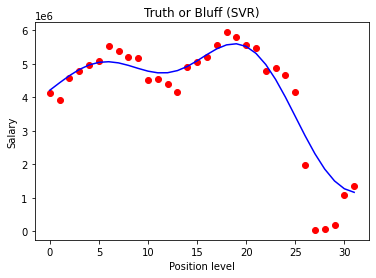

In [ ]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = 'blue')
plt.title('Air port passengers (SVR)')
plt.xlabel('Passengers (In millions)')
plt.ylabel('Months')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

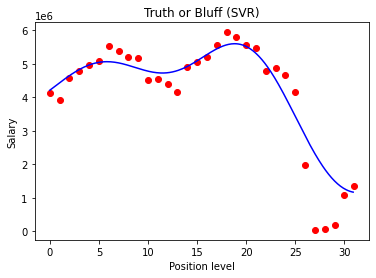

In [ ]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Air port passengers (SVR)')
plt.xlabel('Passengers (In millions)')
plt.ylabel('Months')
plt.show()

# Now to predict of the rest of the year (Medium term)

First we will predict and append to the rest of the list.

In [ ]:
for i in range(31, 48):
  print(int(sc_y.inverse_transform(regressor.predict(sc_X.transform([[i]])))[0]))

1168378
1180560
1295281
1489919
1738916
2016885
2301128
2573342
2820431
3034537
3212450
3354648
3464184
3545608
3604062
3644603
3671764
